In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
file_path = '/content/drive/MyDrive/Colab Notebooks/TransBorderFreight_Data_Analysis/'
file_name ='combined_data.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(file_path+file_name, low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19587500 entries, 0 to 19587499
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       float64
 1   TRDTYPE          float64
 2   USASTATE         object 
 3   DEPE             object 
 4   DISAGMOT         float64
 5   MEXSTATE         object 
 6   CANPROV          object 
 7   COUNTRY          float64
 8   VALUE            float64
 9   SHIPWT           float64
 10  FREIGHT_CHARGES  float64
 11  DF               float64
 12  CONTCODE         object 
 13  MONTH            float64
 14  YEAR             float64
 15  COMMODITY2       float64
dtypes: float64(11), object(5)
memory usage: 2.3+ GB


In [5]:
data.columns

Index(['Unnamed: 0', 'TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'MEXSTATE',
       'CANPROV', 'COUNTRY', 'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF',
       'CONTCODE', 'MONTH', 'YEAR', 'COMMODITY2'],
      dtype='object')

In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
data['QUARTER'] = data['MONTH'].apply(lambda month: (month - 1) // 3 + 1)

In [8]:
data['TRDTYPE'] = data['TRDTYPE'].astype(np.int64)
data['DISAGMOT'] = data['DISAGMOT'].astype(np.int64)
data['COUNTRY'] = data['COUNTRY'].astype(np.int64)

In [9]:
data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,QUARTER
0,1,AK,07XX,3,NaN,XA,1220,3302.0,378.0,125.0,1.0,X,1.0,2020.0,NaN,1.0
1,1,AK,20XX,3,NaN,XA,1220,133362.0,137.0,1563.0,1.0,X,1.0,2020.0,NaN,1.0
2,1,AK,20XX,3,NaN,XA,1220,49960.0,66.0,2631.0,2.0,X,1.0,2020.0,NaN,1.0
3,1,AK,20XX,3,NaN,XC,1220,21184.0,3418.0,795.0,1.0,X,1.0,2020.0,NaN,1.0
4,1,AK,20XX,3,NaN,XM,1220,4253.0,2.0,75.0,1.0,X,1.0,2020.0,NaN,1.0


In [10]:
data.describe()

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR,COMMODITY2,QUARTER
count,1.958750e+07,1.958750e+07,1.958750e+07,1.958750e+07,1.958750e+07,1.958750e+07,1.300578e+07,1.915804e+07,1.958750e+07,1.125488e+07,1.915804e+07
mean,1.336016e+00,4.802884e+00,1.524839e+03,2.889090e+06,1.213028e+06,3.872798e+04,1.327280e+00,4.275678e+00,2.021612e+03,5.701860e+01,1.792717e+00
std,4.723445e-01,1.251357e+00,3.845724e+02,5.236611e+07,5.682021e+07,1.425292e+06,4.692204e-01,2.874910e+00,1.159357e+00,2.770253e+01,9.274372e-01
min,1.000000e+00,1.000000e+00,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03,1.000000e+00,1.000000e+00
25%,1.000000e+00,5.000000e+00,1.220000e+03,1.475100e+04,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.021000e+03,3.400000e+01,1.000000e+00
50%,1.000000e+00,5.000000e+00,1.220000e+03,7.285100e+04,0.000000e+00,2.500000e+02,1.000000e+00,4.000000e+00,2.022000e+03,6.100000e+01,2.000000e+00
75%,2.000000e+00,5.000000e+00,2.010000e+03,4.256550e+05,2.663000e+03,2.739000e+03,2.000000e+00,6.000000e+00,2.022000e+03,8.400000e+01,2.000000e+00
max,2.000000e+00,9.000000e+00,2.010000e+03,5.034212e+10,8.399359e+10,2.354838e+09,2.000000e+00,1.200000e+01,2.024000e+03,9.900000e+01,4.000000e+00


In [11]:
print("Missing values before filling:")
print(data.isnull().sum())

Missing values before filling:
TRDTYPE                   0
USASTATE                  0
DEPE               11254882
DISAGMOT                  0
MEXSTATE           13345389
CANPROV             7558259
COUNTRY                   0
VALUE                     0
SHIPWT                    0
FREIGHT_CHARGES           0
DF                  6581717
CONTCODE                  0
MONTH                429456
YEAR                      0
COMMODITY2          8332618
QUARTER              429456
dtype: int64


In [12]:
data.dropna(subset=['MONTH', 'QUARTER'], inplace=True)

data['DF'].fillna(3, inplace=True) # 3 - (UNKNOWN)
data['DEPE'].fillna('UNKNOWN', inplace=True) # Changing all nulls to 'UNKNOWN
data['COMMODITY2'].fillna(100, inplace=True) # 100 - (UNKNOWN)
print("\nMissing values after filling:")
print(data.isnull().sum())

/tmp/ipython-input-12-2428954577.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DF'].fillna(3, inplace=True) # 3 - (UNKNOWN)
/tmp/ipython-input-12-2428954577.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'


Missing values after filling:
TRDTYPE                   0
USASTATE                  0
DEPE                      0
DISAGMOT                  0
MEXSTATE           13062488
CANPROV             7387141
COUNTRY                   0
VALUE                     0
SHIPWT                    0
FREIGHT_CHARGES           0
DF                        0
CONTCODE                  0
MONTH                     0
YEAR                      0
COMMODITY2                0
QUARTER                   0
dtype: int64


In [13]:
data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,QUARTER
0,1,AK,07XX,3,NaN,XA,1220,3302.0,378.0,125.0,1.0,X,1.0,2020.0,100.0,1.0
1,1,AK,20XX,3,NaN,XA,1220,133362.0,137.0,1563.0,1.0,X,1.0,2020.0,100.0,1.0
2,1,AK,20XX,3,NaN,XA,1220,49960.0,66.0,2631.0,2.0,X,1.0,2020.0,100.0,1.0
3,1,AK,20XX,3,NaN,XC,1220,21184.0,3418.0,795.0,1.0,X,1.0,2020.0,100.0,1.0
4,1,AK,20XX,3,NaN,XM,1220,4253.0,2.0,75.0,1.0,X,1.0,2020.0,100.0,1.0


In [14]:
data['DF'] = data['DF'].astype(np.int64)
data['YEAR'] = data['YEAR'].astype(np.int64)
data['MONTH'] = data['MONTH'].astype(np.int64)
data['COMMODITY2'] = data['COMMODITY2'].astype(np.int64)
data['QUARTER'] = data['QUARTER'].astype(np.int64)

In [15]:
data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,QUARTER
0,1,AK,07XX,3,NaN,XA,1220,3302.0,378.0,125.0,1,X,1,2020,100,1
1,1,AK,20XX,3,NaN,XA,1220,133362.0,137.0,1563.0,1,X,1,2020,100,1
2,1,AK,20XX,3,NaN,XA,1220,49960.0,66.0,2631.0,2,X,1,2020,100,1
3,1,AK,20XX,3,NaN,XC,1220,21184.0,3418.0,795.0,1,X,1,2020,100,1
4,1,AK,20XX,3,NaN,XM,1220,4253.0,2.0,75.0,1,X,1,2020,100,1


In [16]:
data.isnull().sum()['MEXSTATE'] + data.isnull().sum()['CANPROV']

np.int64(20449629)

In [16]:
# Identify rows where both 'MEXSTATE' and 'CANPROV' are not null
rows_to_remove = data[(data['MEXSTATE'].notna()) & (data['CANPROV'].notna())]

# Get the indices of these rows
indices_to_remove = rows_to_remove.index

# Remove the identified rows from the DataFrame
data.drop(indices_to_remove, inplace=True)

print(f"Removed {len(indices_to_remove)} rows where both MEXSTATE and CANPROV had values.")

# Verify the change

Removed 0 rows where both MEXSTATE and CANPROV had values.


In [17]:
data['YEAR'].unique()

array([2020, 2021, 2022, 2023, 2024])

In [18]:
data['QUARTER'].unique()

array([1, 2, 3, 4])

In [19]:
data['MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

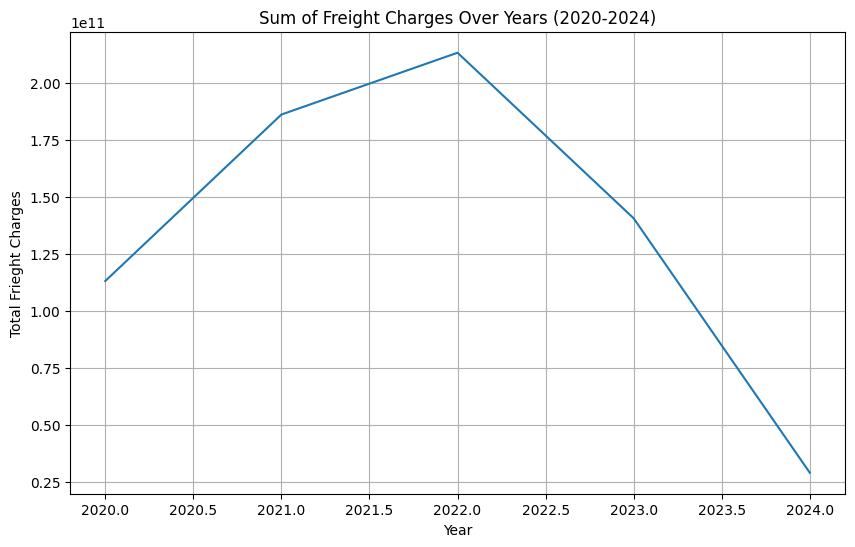

In [20]:
# Group by Year and calculate the sum freight charges
freight_by_year = data.groupby('YEAR')['FREIGHT_CHARGES'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=freight_by_year, x='YEAR', y='FREIGHT_CHARGES')
plt.title('Sum of Freight Charges Over Years (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Total Frieght Charges')
plt.grid(True)

plt.show()


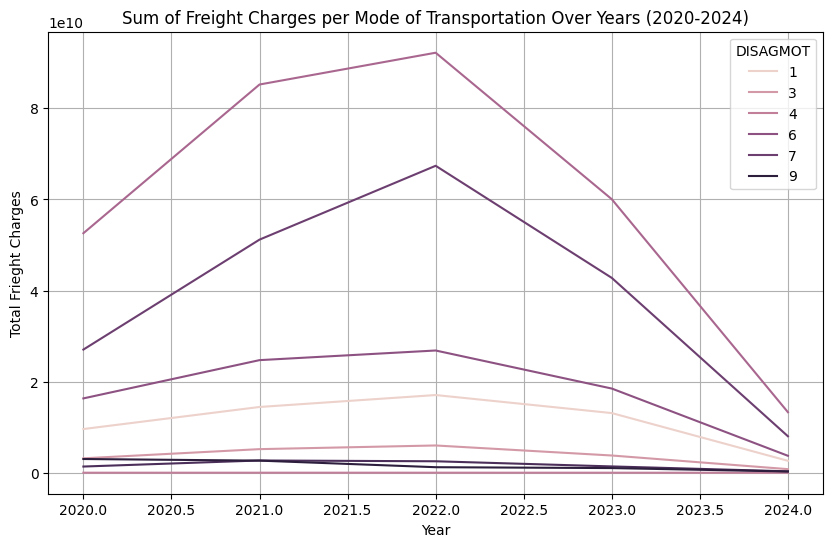

In [21]:
# Group by Year and calculate the sum freight charges
freight_by_year_disagmot = data.groupby(['YEAR', 'DISAGMOT'])['FREIGHT_CHARGES'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=freight_by_year_disagmot, x='YEAR', y='FREIGHT_CHARGES', hue='DISAGMOT')
plt.title('Sum of Freight Charges per Mode of Transportation Over Years (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Total Frieght Charges')
plt.grid(True)

plt.show()

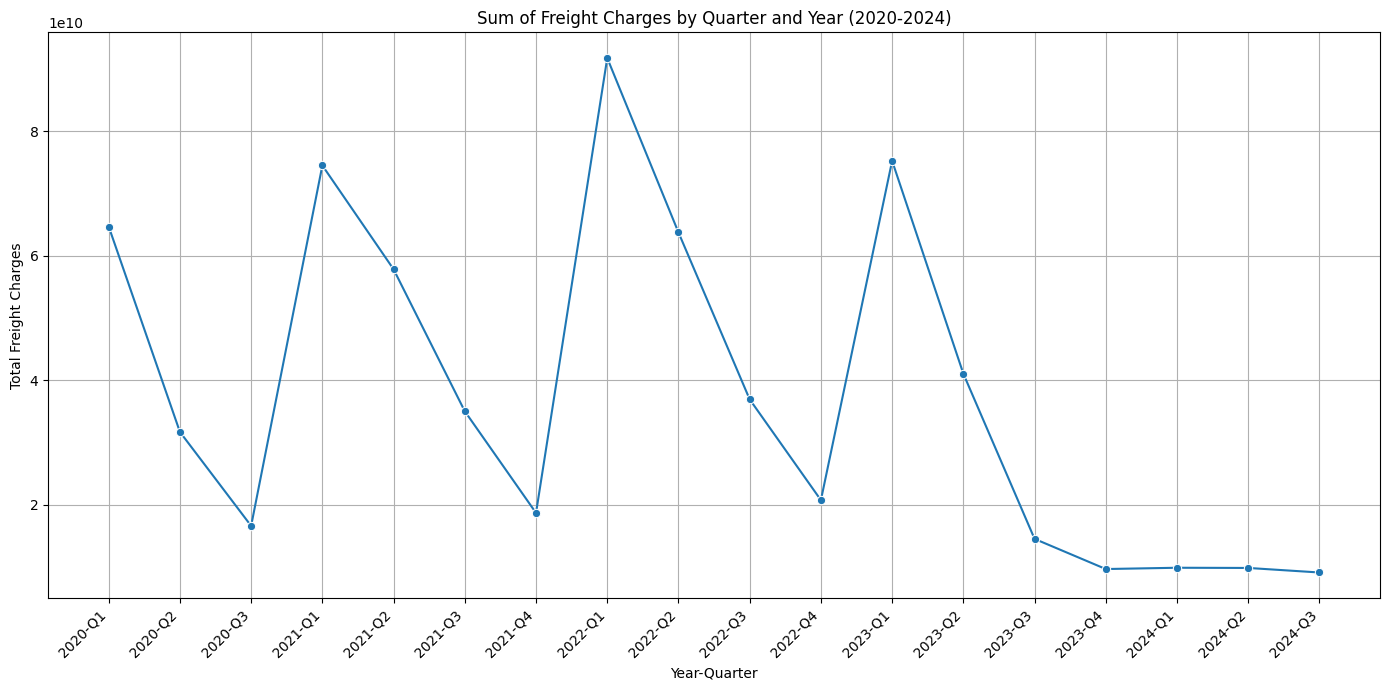

In [22]:
# Group by Year and Quarter and calculate the sum of Freight Charges
freight_by_quarter_year = data.groupby(['YEAR', 'QUARTER'])['FREIGHT_CHARGES'].sum().reset_index()

# Create a combined 'Year-Quarter' column for plotting
freight_by_quarter_year['YEAR_QUARTER'] = freight_by_quarter_year['YEAR'].astype(str) + '-Q' + freight_by_quarter_year['QUARTER'].astype(str)

# Sort the data by Year and Quarter for proper time series plotting
freight_by_quarter_year['YEAR_QUARTER'] = pd.Categorical(freight_by_quarter_year['YEAR_QUARTER'],
                                                        categories=freight_by_quarter_year['YEAR_QUARTER'].unique(),
                                                        ordered=True)
freight_by_quarter_year = freight_by_quarter_year.sort_values(by='YEAR_QUARTER')


# Plot the trend by Quarter and Year
plt.figure(figsize=(14, 7))
sns.lineplot(data=freight_by_quarter_year, x='YEAR_QUARTER', y='FREIGHT_CHARGES', marker='o')
plt.title('Sum of Freight Charges by Quarter and Year (2020-2024)')
plt.xlabel('Year-Quarter')
plt.ylabel('Total Freight Charges')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [17]:
data['COUNTRY'] =  data['COUNTRY'].astype(np.int64)
data['COUNTRY_NAME'] = data['COUNTRY'].apply(lambda x: 'Canada' if x == 1220 else 'Mexico')

In [24]:
data['TRDTYPE'].unique()

array([1, 2])

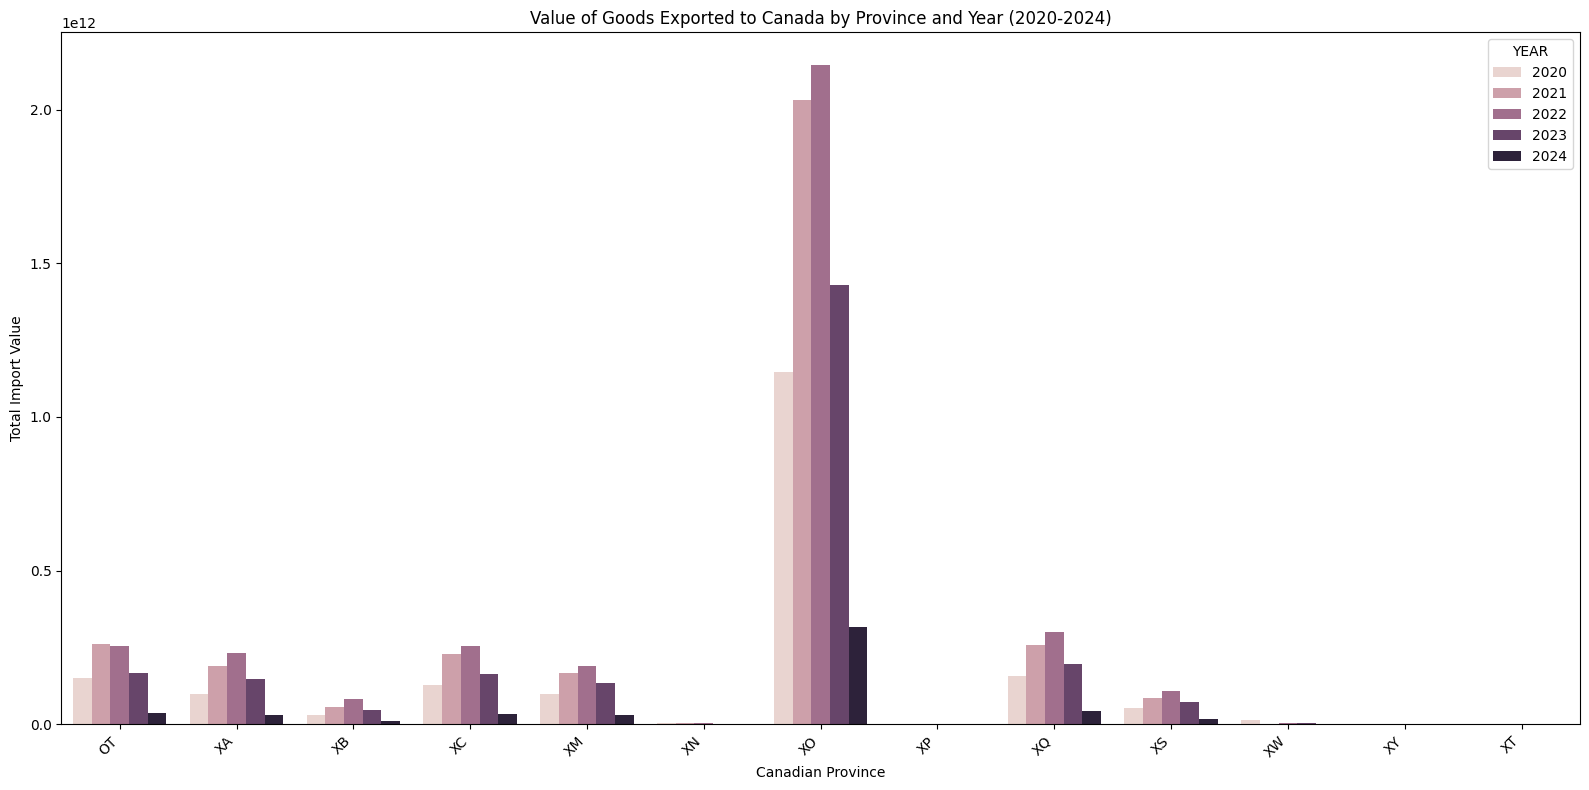

In [18]:
# Filter for Canada as the destination country
canada_data = data[data['COUNTRY_NAME'] == 'Canada']

# Filter for imports (goods entering Canada)
canada_imports = canada_data[canada_data['TRDTYPE'] == 1]

# Group by YEAR and CANPROV (Canadian province) and sum the VALUE to get volume by value
canada_imports_by_province = canada_imports.groupby(['YEAR', 'CANPROV'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(16, 8))
sns.barplot(data=canada_imports_by_province, x='CANPROV', y='VALUE', hue='YEAR')
plt.title('Value of Goods Exported to Canada by Province and Year (2020-2024)')
plt.xlabel('Canadian Province')
plt.ylabel('Total Import Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

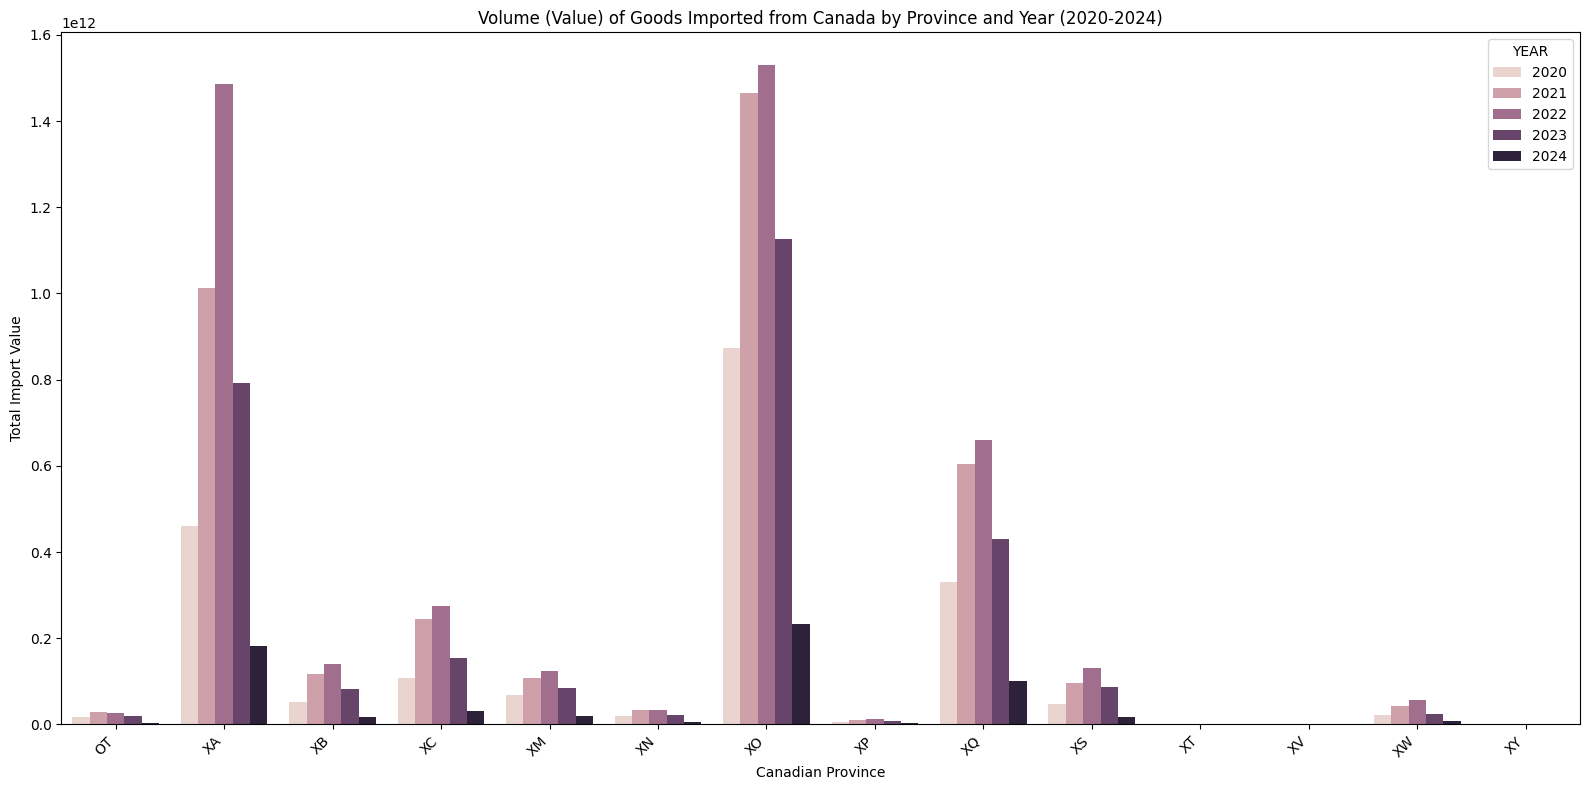

In [19]:
# Filter for Canada as the destination country
canada_data = data[data['COUNTRY_NAME'] == 'Canada']

# Filter for imports (goods leaving for Canada)
canada_exports = canada_data[canada_data['TRDTYPE'] == 2]

# Group by YEAR and CANPROV (Canadian province) and sum the VALUE to get volume by value
canada_exports_by_province = canada_exports.groupby(['YEAR', 'CANPROV'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(16, 8))
sns.barplot(data=canada_exports_by_province, x='CANPROV', y='VALUE', hue='YEAR')
plt.title('Volume (Value) of Goods Imported from Canada by Province and Year (2020-2024)')
plt.xlabel('Canadian Province')
plt.ylabel('Total Import Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

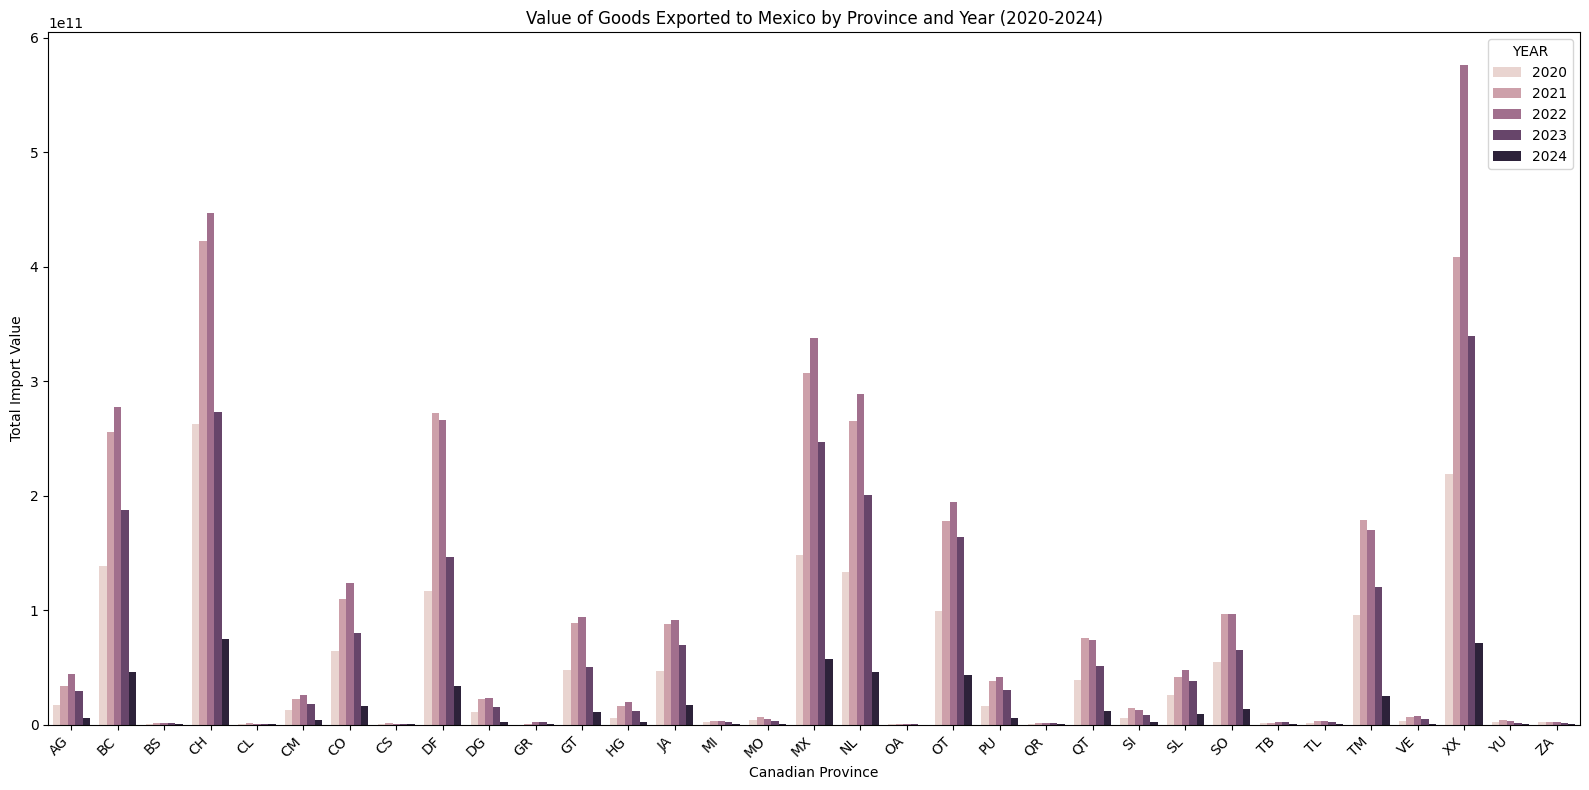

In [20]:
# Filter for Canada as the destination country
mexico_data = data[data['COUNTRY_NAME'] == 'Mexico']

# Filter for imports (goods entering Canada)
mexico_imports = mexico_data[mexico_data['TRDTYPE'] == 1]

# Group by YEAR and MEXSTATE (Mexico State) and sum the VALUE to get volume by value
mexico_imports_by_state = mexico_imports.groupby(['YEAR', 'MEXSTATE'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(16, 8))
sns.barplot(data=mexico_imports_by_state, x='MEXSTATE', y='VALUE', hue='YEAR')
plt.title('Value of Goods Exported to Mexico by Province and Year (2020-2024)')
plt.xlabel('Canadian Province')
plt.ylabel('Total Import Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Filter for Canada as the destination country
mexico_data = data[data['COUNTRY_NAME'] == 'Mexico']

# Filter for imports (goods entering Canada)
mexico_imports = mexico_data[mexico_data['TRDTYPE'] == 1]

# Group by YEAR and MEXSTATE (Mexico State) and sum the VALUE to get volume by value
mexico_imports_by_state = mexico_imports.groupby(['YEAR', 'MEXSTATE'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(16, 8))
sns.barplot(data=mexico_imports_by_state, x='MEXSTATE', y='VALUE', hue='YEAR')
plt.title('Value of Goods Imported from Mexico by Province and Year (2020-2024)')
plt.xlabel('Canadian Province')
plt.ylabel('Total Import Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()